In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/Shreya-P7/set/main/AcademicPerformance.csv')
data.head()

,Gender,Groups,Education Level,Fee Structure,Test Preparation Course,WT Score,DSBDA Score,AI Score
0,Female,Group B,Bachelor's Degree,Standard,None,72.0,72.0,74
1,Female,Group C,Some College,Standard,Completed,69.0,90.0,88
2,Female,Group B,Master's Degree,Standard,None,90.0,95.0,93
3,Male,Group A,Associate's Degree,Free/Reduced,None,47.0,57.0,44
4,Male,Group C,Some College,Standard,None,76.0,78.0,75


In [ ]:
data.isnull().sum()

Gender                     0
Groups                     0
Education Level            3
Fee Structure              0
Test Preparation Course    0
WT Score                   1
DSBDA Score                2
AI Score                   0
dtype: int64

In [ ]:
data['WT Score']=data['WT Score'].fillna(data['WT Score'].mean())

[Text(0.5, 1.0, 'WT Scores')]

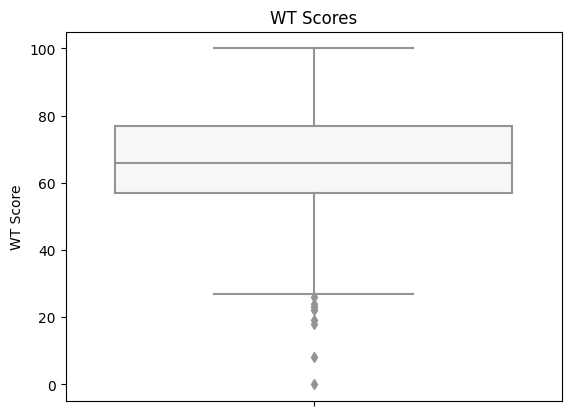

In [ ]:
sns.boxplot(data = data, y = 'WT Score', palette = 'RdBu').set(title = 'WT Scores')

[Text(0.5, 1.0, 'WT Scores')]

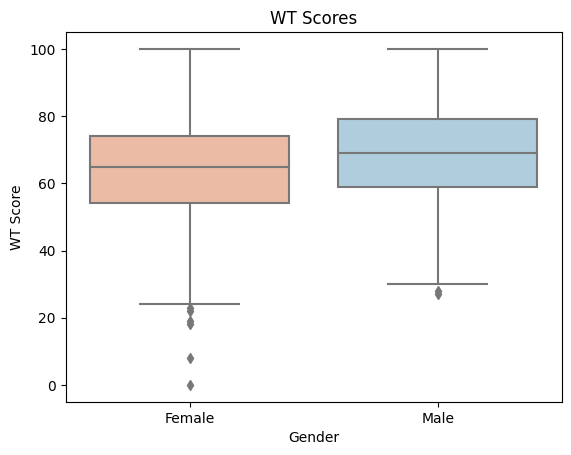

In [ ]:
sns.boxplot(data = data, y = 'WT Score', x = 'Gender', palette = 'RdBu').set(title = 'WT Scores')

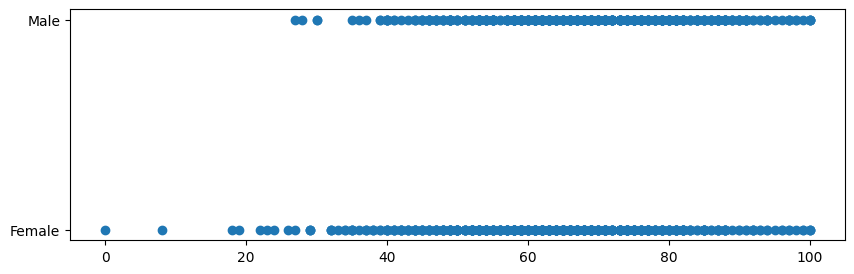

In [ ]:
fig, ax =plt.subplots(figsize=(10,3))
ax.scatter(data['WT Score'], data['Gender'])
plt.show()

In [ ]:
df1=data
df2=data
df3=data

In [ ]:
z_scores = (df1['WT Score'] - df1['WT Score'].mean()) / df1['WT Score'].std()

threshold = 3
outliers_z_score = df1[z_scores > threshold]
df1_ = df1[(np.abs(z_scores) < threshold)]

In [ ]:
outliers_z_score

,Gender,Groups,Education Level,Fee Structure,Test Preparation Course,WT Score,DSBDA Score,AI Score


In [ ]:
boxplot_threshold = 1.5
q1, q3 = np.percentile(df2['WT Score'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - boxplot_threshold * iqr
upper_bound = q3 + boxplot_threshold * iqr
outliers_boxplot = df2[(df2['WT Score'] < lower_bound) | (df2['WT Score'] > upper_bound)]


In [ ]:
print(outliers_boxplot)

     Gender   Groups     Education Level Fee Structure  \
17   Female  Group B    Some High School  Free/Reduced   
59   Female  Group C    Some High School  Free/Reduced   
145  Female  Group C        Some College  Free/Reduced   
338  Female  Group B    Some High School  Free/Reduced   
466  Female  Group D  Associate's Degree  Free/Reduced   
787  Female  Group B        Some College      Standard   
842  Female  Group B         High School  Free/Reduced   
980  Female  Group B         High School  Free/Reduced   

    Test Preparation Course  WT Score  DSBDA Score  AI Score  
17                     None      18.0         32.0        28  
59                     None       0.0         17.0        10  
145                    None      22.0         39.0        33  
338                    None      24.0         38.0        27  
466                    None      26.0         31.0        38  
787                    None      19.0         38.0        32  
842               Completed      23.

In [ ]:
def remove_outliers(df, column):
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    print('The IQR is', iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
 
    df_filtered = df[(df[column] >= lower) & (df[column] <= upper)]
    
    outliers_count = df.shape[0] - df_filtered.shape[0]
    print('Total number of outliers removed:', outliers_count)
    
    return df_filtered

filtered_data = remove_outliers(data, 'WT Score')

The IQR is 20.0
The lower bound value is 27.0
The upper bound value is 107.0
Total number of outliers removed: 8


[Text(0.5, 1.0, 'WT Scores')]

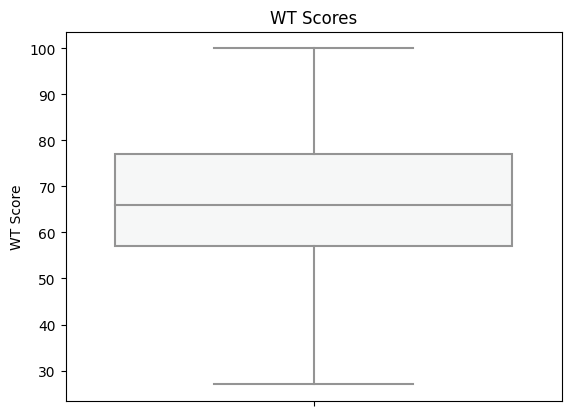

In [ ]:
sns.boxplot(data = filtered_data, y = 'WT Score', palette = 'RdBu').set(title = 'WT Scores')